<a id='start'></a>
# Clusterizzazione e Classificazione

In questo notebook vengono presentati degli esercizi sui Decision Tree.

Provate a svolgere il seguente esercizio:<br>
1) [Cluster e elbow method](#section1)<br>
2) [Segmentazione delle specie](#section2)<br>
3) [Crime in Chicago](#section3)<br>

<a id='section1'></a>
## Cluster e elbow method

Proviamo ad estendere l'esempio dei paesi visto a lezione e carichiamo quindi il dataset più completo:

In [1]:
import pandas as pd
data = pd.read_csv('data/Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


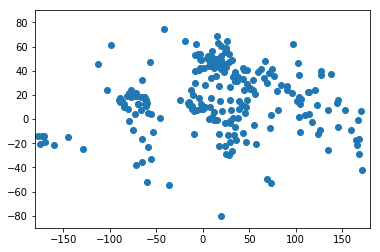

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Calcoliamo il numero di cluster da creare con l'elbow method:

Text(0, 0.5, 'Within-cluster Sum of Squares')

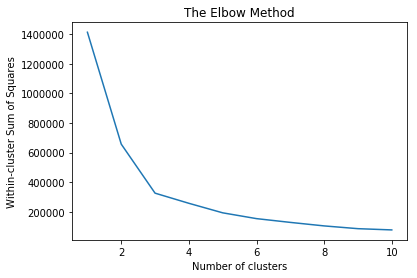

In [3]:
from sklearn.cluster import KMeans

x = data.iloc[:,1:3]
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
number_clusters = range(1, cl_num)

for i in number_clusters:
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    

plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Il numero ottimale di cluster sembra essere 3, procediamo quindi alla clusterizzazione:

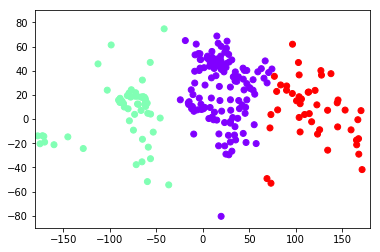

In [7]:
kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

<a id='section2'></a>
## Segmentazione delle specie

Per questo esercizio utilizzeremo l'Iris flower dataset, che è uno dei dataset più popolari per gli esercizi di machine learning. Puoi leggere molte informazioni a riguardo a questo link: https://en.wikipedia.org/wiki/Iris_flower_data_set

In questo dataset ci sono 4 feature: sepal length, sepal width, petal length, and petal width.

Prova a disegnare i dati con 2, 3 e 5 cluster. Cosa osservi?

Prova a identificare il numero ottimale di cluster e poi calcolalo col metodo elbow.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

data = pd.read_csv('data/iris-dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualizziamo i dati:

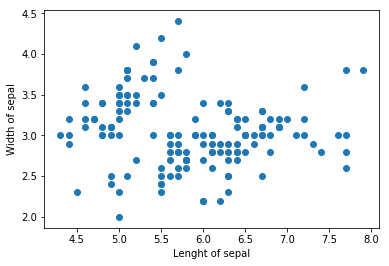

In [21]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'], data['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

Riscaliamo i dati in modo da avere clusterizzazioni più precise:

In [22]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)

Clustering con 2 gruppi:

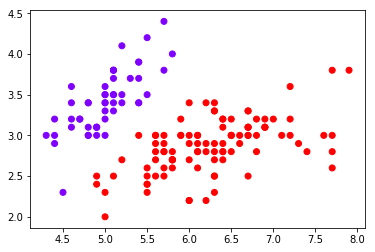

In [23]:
kmeans_2 = KMeans(2)
x = data.copy()
kmeans_2.fit(x_scaled)

# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_2 = data.copy()
clusters_2['cluster_pred'] = kmeans_2.fit_predict(x_scaled)
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c=clusters_2['cluster_pred'], cmap='rainbow')
plt.show()

Clustering con 3 gruppi:

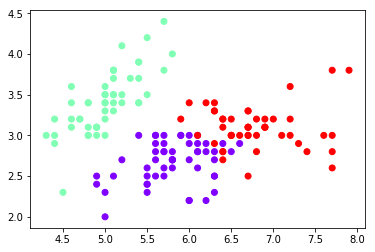

In [24]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_3 = data.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c=clusters_3['cluster_pred'], cmap='rainbow')
plt.show()

Clustering con 5 gruppi:

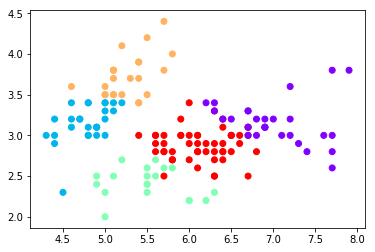

In [25]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_5 = data.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c=clusters_5['cluster_pred'], cmap='rainbow')
plt.show()

Eseguiamo ora il metodo elbow:

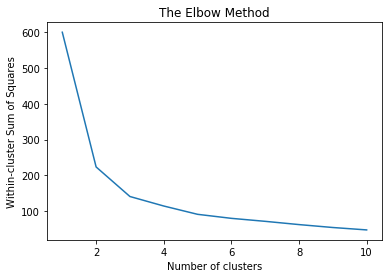

In [27]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Il numero di cluster corretto sembra essere 3:

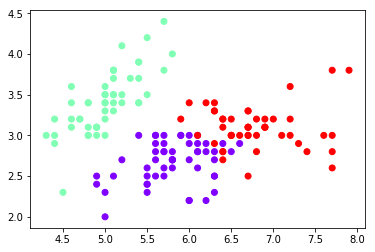

In [29]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_3 = data.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c=clusters_3['cluster_pred'], cmap='rainbow')
plt.show()

Se proviamo a leggere un altro dataset, che vi fornisco apposta, chiamato iris-with-answers.csv, vedrete che effettivamente 3 è il numero delle specie di iris contenute nel dataset.

In [40]:
real_data = pd.read_csv('data/iris-with-answers.csv')
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Il plot di questi dati è molto simile a quello calcolato dal nostro modello e sembra molto confuso:

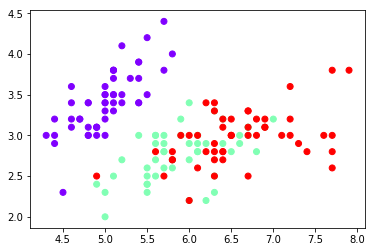

In [41]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
real_data['species'] = real_data['species'].map({'setosa': 0, 'versicolor': 1 , 'virginica': 2})

plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c=real_data['species'], cmap='rainbow')

Ma se invece che il sepalo, guardassi i petali?

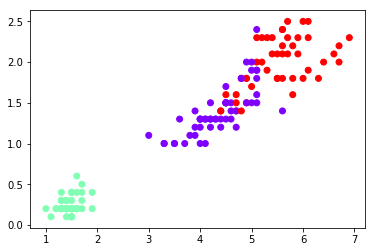

In [42]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c=clusters_3['cluster_pred'], cmap='rainbow')

<a id='section3'></a>
## Crime in Chicago

Leggiamo i dati dei crimini accaduti a Chicago con le coordinate di latitudine e longitudine e vediamo come è possibile raggrupparli in diverse categorie in base alla posizione dove i crimini sono avvenuti.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

In [35]:
df = pd.read_csv('data/Crimes_-_2001_to_present.csv', header=0)
#Ripuliamo i dati eliminando i dati N/A e formattando i campi data
df = df.dropna(axis=0)
df.Date = pd.to_datetime(df.Date, errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10002677,HY191890,2015-03-20 13:13:00,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,...,17.0,67.0,19,1164027.0,1858234.0,2015,2018-02-10 15:50:01,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,10003802,HY193541,2015-03-21 18:45:00,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,26.0,19,1148136.0,1899324.0,2015,2018-02-10 15:50:01,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,10003937,HY193663,2015-03-21 19:55:00,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,...,39.0,14.0,19,1154071.0,1931710.0,2015,2018-02-10 15:50:01,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,10004429,HY194332,2015-03-22 13:57:00,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,24.0,29.0,19,1153407.0,1890195.0,2015,2018-02-10 15:50:01,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,10005837,HY195964,2015-03-23 20:40:00,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,24.0,29.0,19,1150290.0,1889088.0,2015,2018-02-10 15:50:01,41.851561,-87.723887,"(41.851560618, -87.723887245)"


Effettuiamo il metodo elbow sulle location (Longitude e Latitude) dei dati nel dataset:

Text(0, 0.5, 'Within-cluster Sum of Squares')

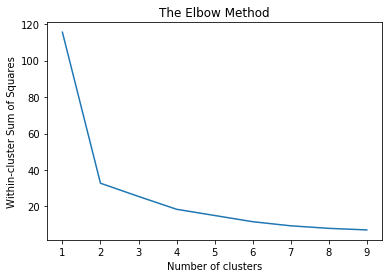

In [4]:
wcss = []

locs = df.loc[:, ['Longitude', 'Latitude']]

cl_num = 10
for i in range (1, cl_num):
    kmeans= KMeans(i)
    kmeans.fit(locs)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
number_clusters = range(1, cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Un numero corretto di cluster sembra essere 2:

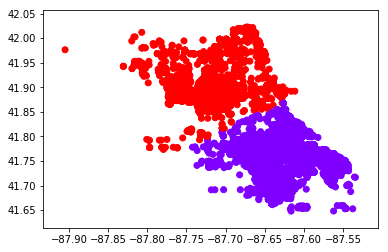

In [34]:
model = KMeans(2)
model.fit(locs)

# Remember that we are plotting the non-standardized values of the sepal length and width. 
df_clustered = locs.copy()
df_clustered['cluster_pred'] = model.fit_predict(df_clustered)
plt.scatter(df.Longitude, df.Latitude, c=df_clustered['cluster_pred'], cmap='rainbow')
plt.show()

Una rappresentazione differente degli stessi dati mostra i centroidi dei vari gruppi:

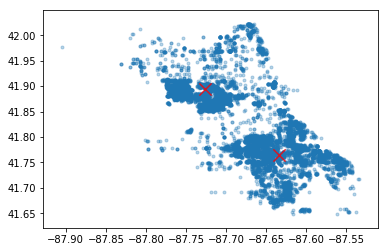

In [44]:
model = KMeans(2)
model.fit(locs)

plt.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

centroids = model.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.8, linewidths=3, s=150)

plt.show()

Siccome i cluster sono 2 proviamo a fare una classificazione dei risultati con un grafico:

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x = df_clustered[['Longitude', 'Latitude']].values
y = df_clustered['cluster_pred']

regr = LogisticRegression(solver='lbfgs')
regr.fit(x, y)

y_pred = regr.predict(x)

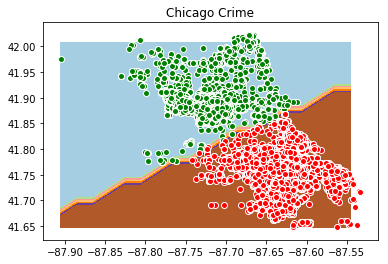

In [33]:
h = .02
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

zz = regr.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=plt.cm.Paired)

X_m = x[y_pred==1]
X_b = x[y_pred==0]
plt.title("Chicago Crime")
plt.scatter(X_b[:, 0], X_b[:, 1], c='green',  edgecolor='white')
plt.scatter(X_m[:, 0], X_m[:, 1], c='red',  edgecolor='white')
plt.show()

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>